## Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns',None)

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

import os
import glob
wdpath = os.getcwd()
wdpath

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'/content'

In [ ]:
# %cd'/content/drive/MyDrive/Colab Notebooks'
# !mkdir data

In [ ]:
# import zipfile
# with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Data.zip", 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/data')

In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [ ]:
test_data = pd.read_excel('Data_Test.xlsx')
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [ ]:
print(train_data.shape)
print(test_data.shape)

(6237, 9)
(1560, 8)


In [ ]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [ ]:
test_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

## Looking at the target value ( Book Price)

In [ ]:
train_data.Price.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

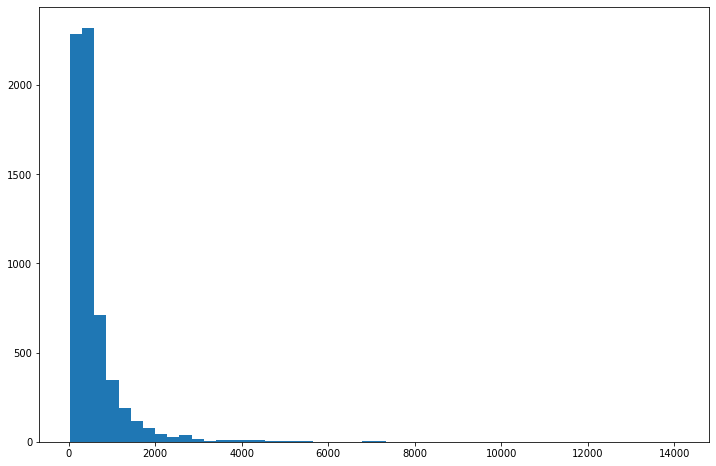

In [ ]:
# import cufflinks as cf
# import chart_studio.plotly as py
# import plotly.express as px
# import seaborn as sns
# %matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()


# fig = px.histogram(train_data.Price, nbins=50,color_discrete_sequence=['orange'])

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600)
# fig.show()

plt.hist(x=train_data.Price, bins=50 )

plt.show()

# EDA

## Edition Type

In [ ]:
train_data['Edition_Type'] = train_data['Edition'].apply(lambda x: x.split(',– ')[0])
#train_data['Edition_type'] = train_data['Edition_Type'].apply(lambda x: x.split(',')[-1])
train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: re.split(',| ',x)[-1])
train_data['Edition_Type'].value_counts()

Paperback       5353
Hardcover        823
music             24
Flexibound        15
Cards              8
Spiral-bound       4
Softcover          3
Leaf               2
book               1
Bound              1
Bundle             1
Comb               1
Binding            1
Name: Edition_Type, dtype: int64

## Rating

In [ ]:
train_data['Rating'] = train_data['Reviews'].apply(lambda x: x.split(" ")[0])
#train_data

In [ ]:
train_data['Rating'].value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
3.4      75
4.9      75
3.3      57
1.0      49
3.1      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
1.6       1
1.7       1
2.1       1
Name: Rating, dtype: int64

## Reviews Number

In [ ]:
train_data['Num_of_reviews'] = train_data['Ratings'].apply(lambda x : x.split(" ")[0])

## Genre

In [ ]:
train_data['Genre'] = train_data['Genre'].apply( lambda x: x.replace("(Books)", "") )
train_data['Genre'].unique()

array(['Action & Adventure ', 'Cinema & Broadcast ',
       'International Relations', 'Contemporary Fiction ',
       'Photography Textbooks', 'Healthy Living & Wellness ',
       'Crime, Thriller & Mystery ', 'Sports Training & Coaching ',
       'Biographies & Autobiographies ', 'Asian History',
       'Banks & Banking', 'Comics & Mangas ',
       "Children's Mysteries & Curiosities ", 'Mangas',
       'Artificial Intelligence', 'Software & Business Applications ',
       'German', 'International Business', 'Cricket ',
       'Comics & Graphic Novels ', 'PC & Video Games ', 'Short Stories ',
       'Astrology', 'Romance ', 'Design',
       'Introductory & Beginning Programming', 'Travel ', 'Sports ',
       'Communications', 'Foreign Languages', 'Linguistics ',
       'Music Books', 'Outdoor Survival Skills ', 'True Accounts ',
       'Literature', 'Society & Culture ',
       'Industries & Business Sectors ', 'Programming Languages ',
       'Media Studies', 'Indian Writing ',
    

In [ ]:
train_data['Genre'].nunique()

345

## Year

In [ ]:
#train_data['Edition'].str.split(" ")

In [ ]:
train_data['Year'] = train_data['Edition'].apply(lambda x : x.split(" ")[-1] if x.split()[-1].isdigit() else '2018')
train_data['Year'].value_counts()

2018    832
2017    757
2016    659
2015    519
2014    402
2013    388
2019    361
2012    304
2011    267
2010    235
2009    182
2008    163
2005    125
2006    110
2007    108
2003     99
2004     85
2002     72
2000     69
2001     66
1999     39
1997     33
1994     33
1998     31
1992     31
1995     30
1996     27
1993     22
1989     20
1991     19
1986     16
1988     15
1984     15
1990     14
1982     14
1987     13
1983     10
1985     10
1976      6
1980      5
1975      4
1971      4
1974      3
1977      3
1964      3
1979      2
1960      2
1978      2
1905      1
1973      1
1970      1
1925      1
1961      1
1981      1
1969      1
1900      1
Name: Year, dtype: int64

In [ ]:
train_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Type,Rating,Num_of_reviews,Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,Action & Adventure,220.00,Paperback,4.0,8,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast,"Biographies, Diaries & True Accounts",202.93,Paperback,3.9,14,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,4.8,6,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,Paperback,4.1,13,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,5.0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology,Humour,322.00,Paperback,5.0,2,2018
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction,"Crime, Thriller & Mystery",421.00,Paperback,3.3,9,2016
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,Romance,399.00,Paperback,3.8,3,2006
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,Action & Adventure,319.00,Paperback,3.5,4,2015


## Repeat for test data

In [ ]:
test_data['Edition_Type'] = test_data['Edition'].apply(lambda x: x.split(',– ')[0])
test_data['Edition_Type'] = test_data['Edition_Type'].apply(lambda x: re.split(',| ',x)[-1])

test_data['Rating'] = test_data['Reviews'].apply(lambda x: x.split(" ")[0])

test_data['Num_of_reviews'] = test_data['Ratings'].apply(lambda x : x.split(" ")[0])

test_data['Genre'] = test_data['Genre'].apply( lambda x: x.replace("(Books)", "") )

test_data['Year'] = test_data['Edition'].apply(lambda x : x.split(" ")[-1] if x.split()[-1].isdigit() else '2018')

test_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Rating,Num_of_reviews,Year
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories,"Crime, Thriller & Mystery",Paperback,4.4,960,1986
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,5.0,1,2018
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance,Romance,Paperback,5.0,4,2011
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development,"Computing, Internet & Digital Media",Paperback,4.1,11,2016
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics,"Language, Linguistics & Writing",Paperback,4.4,9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",Paperback,5.0,4,2011
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference,"Biographies, Diaries & True Accounts",Paperback,3.6,13,2013
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour,Humour,Paperback,4.0,5,2011
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",Paperback,3.5,3,2009


In [ ]:
train_data['Edition_Type'].value_counts()

Paperback       5353
Hardcover        823
music             24
Flexibound        15
Cards              8
Spiral-bound       4
Softcover          3
Leaf               2
book               1
Bound              1
Bundle             1
Comb               1
Binding            1
Name: Edition_Type, dtype: int64

In [ ]:
# Merging categories with small frequencies

threshold_percentage = 1
series = pd.value_counts(train_data['Edition_Type'])
mask = (series/series.sum() *100).lt(threshold_percentage)
train_data = train_data.assign(Edition_Type_updated = np.where(train_data['Edition_Type'].isin(series[mask].index),'Other', train_data['Edition_Type']))

In [ ]:
train_data['Edition_Type_updated'].value_counts()

Paperback    5353
Hardcover     823
Other          61
Name: Edition_Type_updated, dtype: int64

In [ ]:
# Merging categories with small frequencies
threshold_percent = 1

series = pd.value_counts(test_data['Edition_Type'])
mask = (series / series.sum() * 100).lt(threshold_percent)
test_data = test_data.assign(Edition_Type_updated = np.where(test_data['Edition_Type'].isin(series[mask].index),'Other', test_data['Edition_Type']))

In [ ]:
test_data['Edition_Type_updated'].value_counts()

Paperback    1311
Hardcover     233
Other          16
Name: Edition_Type_updated, dtype: int64

In [ ]:
for col in train_data.select_dtypes(include='object'):
    train_data[col] = train_data[col].str.lower()

In [ ]:
for col in test_data.select_dtypes(include='object'):
    test_data[col] = test_data[col].str.lower()

In [ ]:
train_data['Num_of_reviews'].unique()

array(['8', '14', '6', '13', '1', '72', '16', '111', '132', '17', '4',
       '3', '5', '2', '23', '76', '10', '9', '15', '34', '32', '49', '62',
       '61', '7', '18', '98', '12', '97', '285', '29', '27', '267', '24',
       '146', '95', '234', '35', '66', '20', '39', '171', '399', '42',
       '142', '11', '839', '47', '165', '30', '53', '77', '33', '37',
       '54', '28', '50', '197', '26', '114', '46', '51', '161', '135',
       '41', '156', '1,416', '93', '221', '36', '154', '74', '45', '240',
       '55', '19', '48', '404', '245', '22', '292', '25', '75', '381',
       '44', '443', '425', '21', '238', '84', '68', '108', '52', '57',
       '109', '89', '304', '96', '419', '205', '85', '960', '71', '167',
       '58', '40', '102', '101', '65', '70', '106', '922', '31', '38',
       '63', '177', '138', '164', '257', '207', '64', '56', '196', '82',
       '1,558', '567', '60', '80', '303', '73', '193', '155', '798',
       '128', '87', '90', '286', '565', '137', '99', '403', '277',

In [ ]:
train_data['Num_of_reviews'] = train_data['Num_of_reviews'].apply(lambda x: x.replace(',', ''))
train_data.Num_of_reviews = train_data.Num_of_reviews.astype('int32')

In [ ]:
test_data['Num_of_reviews'] = test_data['Num_of_reviews'].apply(lambda x: x.replace(',', ''))
test_data.Num_of_reviews = test_data.Num_of_reviews.astype('int32')

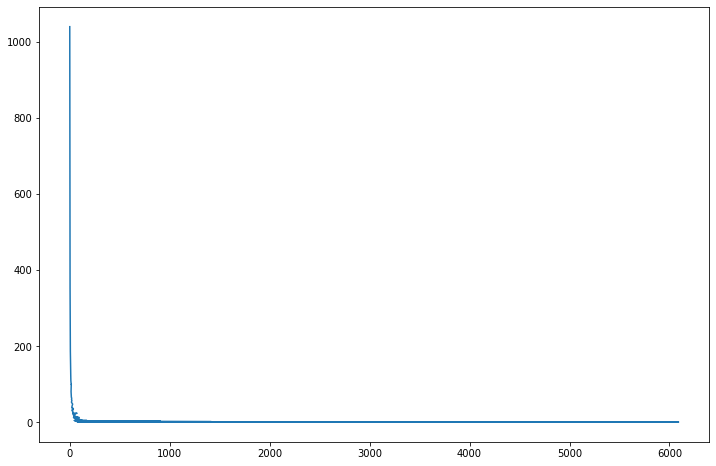

In [ ]:
train_data.Num_of_reviews.value_counts().plot()
plt.show()

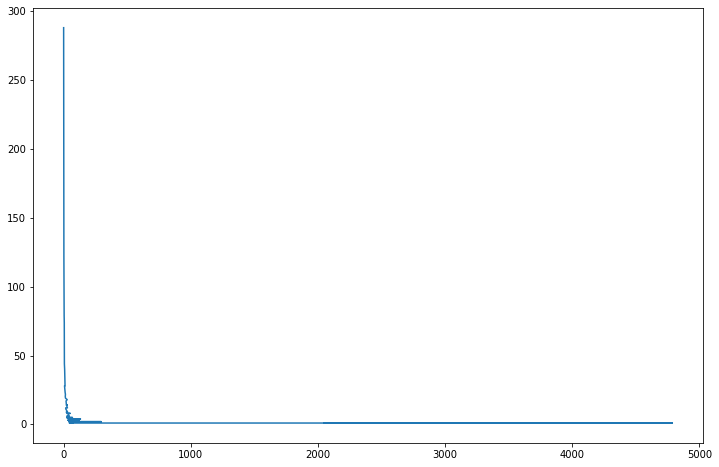

In [ ]:
test_data.Num_of_reviews.value_counts().plot()
plt.show()

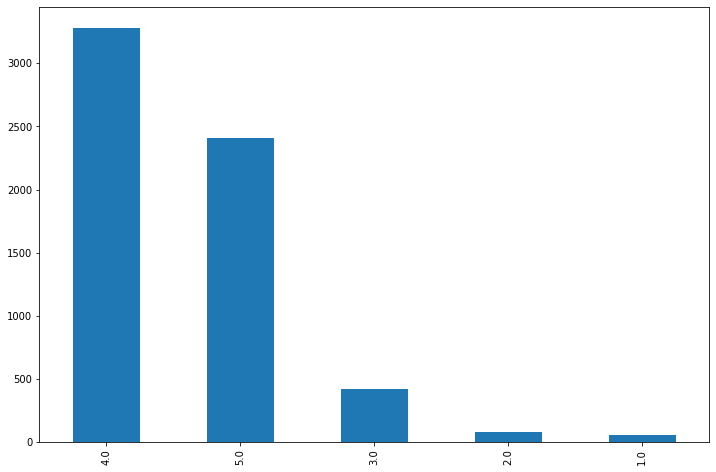

In [ ]:
train_data.Rating = round(train_data.Rating.astype('float64'))
train_data.Rating.value_counts().plot(kind = 'bar')
plt.show()

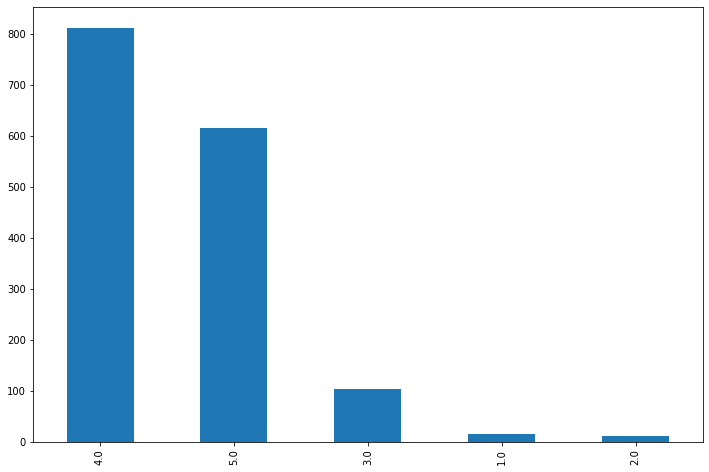

In [ ]:
test_data.Rating = round(test_data.Rating.astype('float64'))
test_data.Rating.value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
train_data.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Type,Rating,Num_of_reviews,Year,Edition_Type_updated
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0 out of 5 stars,8 customer reviews,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,paperback,4.0,8,2016,paperback
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9 out of 5 stars,14 customer reviews,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,paperback,4.0,14,2012,paperback
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8 out of 5 stars,6 customer reviews,"""during the time men live without a common pow...",international relations,humour,299.00,paperback,5.0,6,1982,paperback
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1 out of 5 stars,13 customer reviews,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",180.00,paperback,4.0,13,2017,paperback
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0 out of 5 stars,1 customer review,"for seven decades, ""life"" has been thrilling t...",photography textbooks,"arts, film & photography",965.62,hardcover,5.0,1,2006,hardcover
5,chirunning: a revolutionary approach to effort...,danny dreyer,"paperback,– 5 may 2009",4.5 out of 5 stars,8 customer reviews,the revised edition of the bestselling chirunn...,healthy living & wellness,sports,900.00,paperback,4.0,8,2009,paperback
6,death on the nile (poirot),agatha christie,"paperback,– 5 oct 2017",4.4 out of 5 stars,72 customer reviews,agatha christie’s most exotic murder mystery\n...,"crime, thriller & mystery","crime, thriller & mystery",224.00,paperback,4.0,72,2017,paperback
7,yoga your home practice companion: a complete ...,sivananda yoga vedanta centre,"hardcover,– import, 1 mar 2018",4.7 out of 5 stars,16 customer reviews,"achieve a healthy body, mental alertness, and ...",sports training & coaching,sports,836.00,hardcover,5.0,16,2018,hardcover
8,karmayogi: a biography of e. sreedharan,m s ashokan,"paperback,– 15 dec 2015",4.2 out of 5 stars,111 customer reviews,karmayogi is the dramatic and inspiring story ...,biographies & autobiographies,"biographies, diaries & true accounts",130.00,paperback,4.0,111,2015,paperback
9,"the iron king (the accursed kings, book 1)",maurice druon,"paperback,– 26 mar 2013",4.0 out of 5 stars,1 customer review,‘this is the original game of thrones’ george ...,action & adventure,action & adventure,695.00,paperback,4.0,1,2013,paperback


## Synopsis

In [ ]:
train_data.Synopsis[4]

'for seven decades, "life" has been thrilling the world with its unrivalled presentation of the very best photography to be found. here, the editors have assembled the creme de la creme from the magazine\'s vast collection of images. because "life" has always dealt with matters of every sort, the entire spectrum of society is represented in these pages. one after another, there are unforgettable photos from hollywood\'s greatest stars, from the wonders of small-town america, from the terrible wars, as well as from the zestful years of childhood. "life" has always represented the apex in photojournalism and its roster of great photographers is unequalled.'

In [ ]:
test_data.Synopsis[4]

'learn and practise the verbs, prepositions and idioms you need to speak and write naturally in english.'

In [ ]:
train_data.Synopsis

0       the hunters return in their third brilliant no...
1       a layered portrait of a troubled genius for wh...
2       "during the time men live without a common pow...
3       a handful of grain is found in the pocket of a...
4       for seven decades, "life" has been thrilling t...
                              ...                        
6232    'f*cking brilliant' sarah knight\n'very funny'...
6233    in this gripping page-turner, an ex-agent on t...
6234    'the most refreshing and radiant love story yo...
6235    frostfire by amanda hocking is the stunning fi...
6236    six years ago, sam capra watched his brother, ...
Name: Synopsis, Length: 6237, dtype: object

In [ ]:
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join(x.lower() for x in x.split()))
train_data.Synopsis = train_data.Synopsis.apply(lambda x: x.replace('"','') )
train_data.Synopsis = train_data.Synopsis.apply(lambda x: x.replace("'",'') )
train_data.Synopsis

0       the hunters return in their third brilliant no...
1       a layered portrait of a troubled genius for wh...
2       during the time men live without a common powe...
3       a handful of grain is found in the pocket of a...
4       for seven decades, life has been thrilling the...
                              ...                        
6232    f*cking brilliant sarah knight very funny mark...
6233    in this gripping page-turner, an ex-agent on t...
6234    the most refreshing and radiant love story you...
6235    frostfire by amanda hocking is the stunning fi...
6236    six years ago, sam capra watched his brother, ...
Name: Synopsis, Length: 6237, dtype: object

Stop Words: 
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory

In [ ]:
stop = stopwords.words('english')
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_data.Synopsis

0       hunters return third brilliant novel sunday ti...
1       layered portrait troubled genius art merely th...
2       time men live without common power keep awe, c...
3       handful grain found pocket murdered businessma...
4       seven decades, life thrilling world unrivalled...
                              ...                        
6232    f*cking brilliant sarah knight funny mark wats...
6233    gripping page-turner, ex-agent run former empl...
6234    refreshing radiant love story youll read year....
6235    frostfire amanda hocking stunning first instal...
6236    six years ago, sam capra watched brother, dann...
Name: Synopsis, Length: 6237, dtype: object

Stemming : Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. Stemming is an important part of the pipelining process in Natural language processing. The input to the stemmer is tokenized words.

Porter’s Stemmer algorithm:

It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes. This stemmer is known for its speed and simplicity. The main applications of Porter Stemmer include data mining and Information retrieval. However, its applications are only limited to English words. Also, the group of stems is mapped on to the same stem and the output stem is not necessarily a meaningful word. The algorithms are fairly lengthy in nature and are known to be the oldest stemmer.
Example: EED -> EE means “if the word has at least one vowel and consonant plus EED ending, change the ending to EE” as ‘agreed’ becomes ‘agree’. 

In [ ]:
st = PorterStemmer()
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
train_data.Synopsis

0       hunter return third brilliant novel sunday tim...
1       layer portrait troubl geniu art mere thing bea...
2       time men live without common power keep awe, c...
3       hand grain found pocket murder businessman… re...
4       seven decades, life thrill world unrival prese...
                              ...                        
6232    f*cking brilliant sarah knight funni mark wats...
6233    grip page-turner, ex-ag run former employ must...
6234    refresh radiant love stori youll read year. - ...
6235    frostfir amanda hock stun first instal tale lo...
6236    six year ago, sam capra watch brother, danny, ...
Name: Synopsis, Length: 6237, dtype: object

TextBlob module is a Python library and offers a simple API to access its methods and perform basic NLP tasks. It is built on the top of NLTK module.

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [ ]:
train_data['Sentiment'] = train_data.Synopsis.apply(lambda tweet: TextBlob(tweet).sentiment)
train_data['Sentiment']

0         (0.20879953379953375, 0.45134032634032634)
1          (0.08993506493506491, 0.3634199134199134)
2          (0.04790552584670231, 0.3845811051693405)
3                                        (0.0, 0.25)
4                         (0.5599999999999999, 0.61)
                            ...                     
6232    (-0.007142857142857151, 0.38944099378881986)
6233      (-0.08440656565656567, 0.4414953102453102)
6234        (0.4258741258741259, 0.4811188811188811)
6235       (0.16851851851851854, 0.4999999999999999)
6236      (0.013333333333333322, 0.4716666666666668)
Name: Sentiment, Length: 6237, dtype: object

In [ ]:
sentiment_series = train_data['Sentiment'].tolist()
columns = ['polarity', 'subjectivity']

df = pd.DataFrame(sentiment_series, columns=columns, index=train_data.index)

train_data['polarity'] = df['polarity']
train_data['subjectivity'] = df['subjectivity']
#train_data

Repeating the process for test data

In [ ]:
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join(x.lower() for x in x.split()))
test_data.Synopsis = test_data.Synopsis.apply(lambda x: x.replace('"','') )
test_data.Synopsis = test_data.Synopsis.apply(lambda x: x.replace("'",'') )

stop = stopwords.words('english')
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

st = PorterStemmer()
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

test_data['Sentiment'] = test_data.Synopsis.apply(lambda tweet: TextBlob(tweet).sentiment)

sentiment_series = test_data['Sentiment'].tolist()
columns = ['polarity', 'subjectivity']

df = pd.DataFrame(sentiment_series, columns=columns, index=test_data.index)

test_data['polarity'] = df['polarity']
test_data['subjectivity'] = df['subjectivity']

In [ ]:
train_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Type,Rating,Num_of_reviews,Year,Edition_Type_updated,Sentiment,polarity,subjectivity
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0 out of 5 stars,8 customer reviews,hunter return third brilliant novel sunday tim...,action & adventure,action & adventure,220.00,paperback,4.0,8,2016,paperback,"(0.20879953379953375, 0.45134032634032634)",0.208800,0.451340
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9 out of 5 stars,14 customer reviews,layer portrait troubl geniu art mere thing bea...,cinema & broadcast,"biographies, diaries & true accounts",202.93,paperback,4.0,14,2012,paperback,"(0.08993506493506491, 0.3634199134199134)",0.089935,0.363420
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8 out of 5 stars,6 customer reviews,"time men live without common power keep awe, c...",international relations,humour,299.00,paperback,5.0,6,1982,paperback,"(0.04790552584670231, 0.3845811051693405)",0.047906,0.384581
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1 out of 5 stars,13 customer reviews,hand grain found pocket murder businessman… re...,contemporary fiction,"crime, thriller & mystery",180.00,paperback,4.0,13,2017,paperback,"(0.0, 0.25)",0.000000,0.250000
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0 out of 5 stars,1 customer review,"seven decades, life thrill world unrival prese...",photography textbooks,"arts, film & photography",965.62,hardcover,5.0,1,2006,hardcover,"(0.5599999999999999, 0.61)",0.560000,0.610000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,humans: a brief history of how we f*cked it al...,tom phillips,"paperback,– 8 aug 2018",5.0 out of 5 stars,2 customer reviews,f*cking brilliant sarah knight funni mark wats...,anthropology,humour,322.00,paperback,5.0,2,2018,paperback,"(-0.007142857142857151, 0.38944099378881986)",-0.007143,0.389441
6233,the chemist,stephenie meyer,"paperback,– 21 nov 2016",3.3 out of 5 stars,9 customer reviews,"grip page-turner, ex-ag run former employ must...",contemporary fiction,"crime, thriller & mystery",421.00,paperback,3.0,9,2016,paperback,"(-0.08440656565656567, 0.4414953102453102)",-0.084407,0.441495
6234,the duke and i: number 1 in series (bridgerton...,julia quinn,"paperback,– 8 jun 2006",3.8 out of 5 stars,3 customer reviews,refresh radiant love stori youll read year. - ...,romance,romance,399.00,paperback,4.0,3,2006,paperback,"(0.4258741258741259, 0.4811188811188811)",0.425874,0.481119
6235,frostfire (kanin chronicles),amanda hocking,"paperback,– 15 jan 2015",3.5 out of 5 stars,4 customer reviews,frostfir amanda hock stun first instal tale lo...,action & adventure,action & adventure,319.00,paperback,4.0,4,2015,paperback,"(0.16851851851851854, 0.4999999999999999)",0.168519,0.500000


In [ ]:
test_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Rating,Num_of_reviews,Year,Edition_Type_updated,Sentiment,polarity,subjectivity
0,the complete sherlock holmes: 2 boxes sets,sir arthur conan doyle,"mass market paperback,– 1 oct 1986",4.4 out of 5 stars,960 customer reviews,collect entir bodi work sherlock holm seri art...,short stories,"crime, thriller & mystery",paperback,4.0,960,1986,paperback,"(0.05297619047619046, 0.35416666666666663)",0.052976,0.354167
1,learn docker - fundamentals of docker 18.x: ev...,gabriel n. schenker,"paperback,– import, 26 apr 2018",5.0 out of 5 stars,1 customer review,enhanc softwar deploy workflow use contain key...,operating systems textbooks,"computing, internet & digital media",paperback,5.0,1,2018,paperback,"(0.00909090909090909, 0.41928904428904423)",0.009091,0.419289
2,big girl,danielle steel,"paperback,– 17 mar 2011",5.0 out of 5 stars,4 customer reviews,"watch out, world. come! victoria dawson, grow ...",romance,romance,paperback,5.0,4,2011,paperback,"(0.18165168165168163, 0.5614885114885114)",0.181652,0.561489
3,think python: how to think like a computer sci...,allen b. downey,"paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"want learn program, work python excel way star...",programming & software development,"computing, internet & digital media",paperback,4.0,11,2016,paperback,"(0.17666666666666667, 0.40805555555555556)",0.176667,0.408056
4,oxford word skills: advanced - idioms & phrasa...,redman gairns,"paperback,– 26 dec 2011",4.4 out of 5 stars,9 customer reviews,"learn practis verbs, preposit idiom need speak...",linguistics,"language, linguistics & writing",paperback,4.0,9,2011,paperback,"(0.0, 0.0)",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 things every designer needs to know about ...,susan weinschenk,"paperback,– 14 apr 2011",5.0 out of 5 stars,4 customer reviews,design elicit respons people. want buy somethi...,design,"computing, internet & digital media",paperback,5.0,4,2011,paperback,"(0.1976689976689977, 0.4285547785547786)",0.197669,0.428555
1556,"modern letter writing course: personal, busine...",arun sagar,"paperback,– 8 may 2013",3.6 out of 5 stars,13 customer reviews,"30-day cours write simple, sharp attract lette...",children's reference,"biographies, diaries & true accounts",paperback,4.0,13,2013,paperback,"(-0.018333333333333333, 0.2947619047619048)",-0.018333,0.294762
1557,the kite runner graphic novel,khaled hosseini,"paperback,– 6 sep 2011",4.0 out of 5 stars,5 customer reviews,perenni bestseller-now avail sensat new graphi...,humour,humour,paperback,4.0,5,2011,paperback,"(0.11456228956228959, 0.4769360269360269)",0.114562,0.476936
1558,panzer leader (penguin world war ii collection),heinz guderian,"paperback,– 22 sep 2009",3.5 out of 5 stars,3 customer reviews,heinz guderian - master blitzkrieg father mode...,united states history,"biographies, diaries & true accounts",paperback,4.0,3,2009,paperback,"(0.06666666666666667, 0.26666666666666666)",0.066667,0.266667


In [ ]:
train_data.Synopsis[4]

'seven decades, life thrill world unrival present best photographi found. here, editor assembl creme de la creme magazin vast collect images. life alway dealt matter everi sort, entir spectrum societi repres pages. one another, unforgett photo hollywood greatest stars, wonder small-town america, terribl wars, well zest year childhood. life alway repres apex photojourn roster great photograph unequalled.'

In [ ]:
test_data.Synopsis[4]

'learn practis verbs, preposit idiom need speak write natur english.'

In [ ]:
train_data.drop(['Edition_Type','Synopsis','Title', 'Sentiment','Edition','Reviews','Ratings'], axis = 1, inplace = True)

In [ ]:
test_data.drop(['Edition_Type','Synopsis','Title', 'Sentiment','Edition','Reviews','Ratings'], axis = 1, inplace = True)

In [ ]:
cat_cols = train_data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = train_data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Author', 'Genre', 'BookCategory', 'Year', 'Edition_Type_updated']
['Price', 'Rating', 'polarity', 'subjectivity']


In [ ]:
cat_cols_test = test_data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols_test)

num_cols_test = test_data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols_test)

['Author', 'Genre', 'BookCategory', 'Year', 'Edition_Type_updated']
['Rating', 'polarity', 'subjectivity']


In [ ]:
train_data.head()

,Author,Genre,BookCategory,Price,Rating,Num_of_reviews,Year,Edition_Type_updated,polarity,subjectivity
0,chris kuzneski,action & adventure,action & adventure,220.00,4.0,8,2016,paperback,0.208800,0.451340
1,arun khopkar,cinema & broadcast,"biographies, diaries & true accounts",202.93,4.0,14,2012,paperback,0.089935,0.363420
2,thomas hobbes,international relations,humour,299.00,5.0,6,1982,paperback,0.047906,0.384581
3,agatha christie,contemporary fiction,"crime, thriller & mystery",180.00,4.0,13,2017,paperback,0.000000,0.250000
4,editors of life,photography textbooks,"arts, film & photography",965.62,5.0,1,2006,hardcover,0.560000,0.610000


In [ ]:
test_data.head()

,Author,Genre,BookCategory,Rating,Num_of_reviews,Year,Edition_Type_updated,polarity,subjectivity
0,sir arthur conan doyle,short stories,"crime, thriller & mystery",4.0,960,1986,paperback,0.052976,0.354167
1,gabriel n. schenker,operating systems textbooks,"computing, internet & digital media",5.0,1,2018,paperback,0.009091,0.419289
2,danielle steel,romance,romance,5.0,4,2011,paperback,0.181652,0.561489
3,allen b. downey,programming & software development,"computing, internet & digital media",4.0,11,2016,paperback,0.176667,0.408056
4,redman gairns,linguistics,"language, linguistics & writing",4.0,9,2011,paperback,0.000000,0.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Author                6237 non-null   object 
 1   Genre                 6237 non-null   object 
 2   BookCategory          6237 non-null   object 
 3   Price                 6237 non-null   float64
 4   Rating                6237 non-null   float64
 5   Num_of_reviews        6237 non-null   int32  
 6   Year                  6237 non-null   object 
 7   Edition_Type_updated  6237 non-null   object 
 8   polarity              6237 non-null   float64
 9   subjectivity          6237 non-null   float64
dtypes: float64(4), int32(1), object(5)
memory usage: 463.0+ KB


# Feature Analysis

(array([5.855e+03, 3.010e+02, 4.400e+01, 2.300e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   25. ,  1432.5,  2840. ,  4247.5,  5655. ,  7062.5,  8470. ,
         9877.5, 11285. , 12692.5, 14100. ]),
 <a list of 10 Patch objects>)

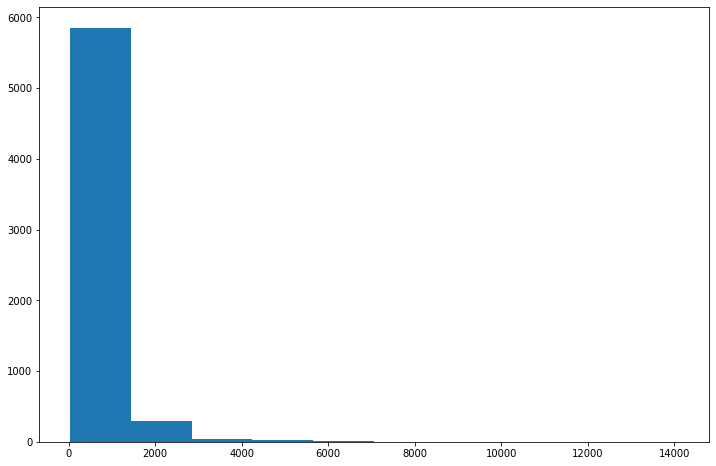

In [ ]:
plt.hist(train_data.Price)

In [ ]:
print(train_data['Price'].skew() )
print(train_data['Price'].kurt() )

6.749865573718627
80.8434519609723


I will later use box-cox transformation for our target value. 
Similarly, inv box-cox for predicted values

Polarity

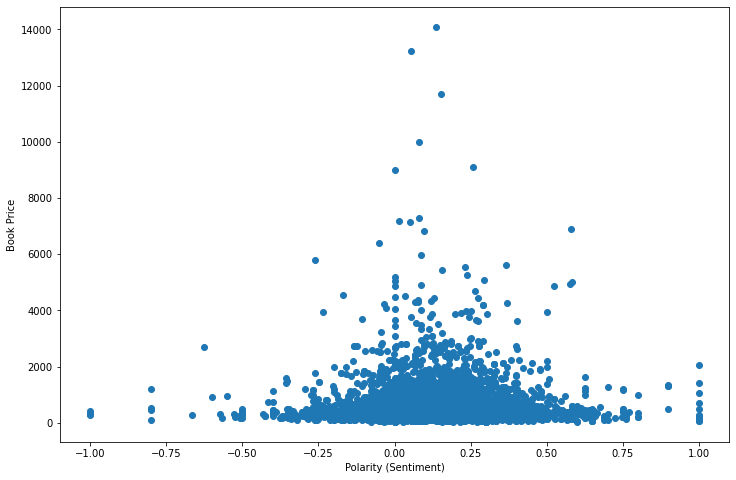

In [ ]:
plt.scatter( 'polarity','Price', data=train_data  )
plt.xlabel('Polarity (Sentiment)')
plt.ylabel('Book Price')
plt.show()

Subjectivity

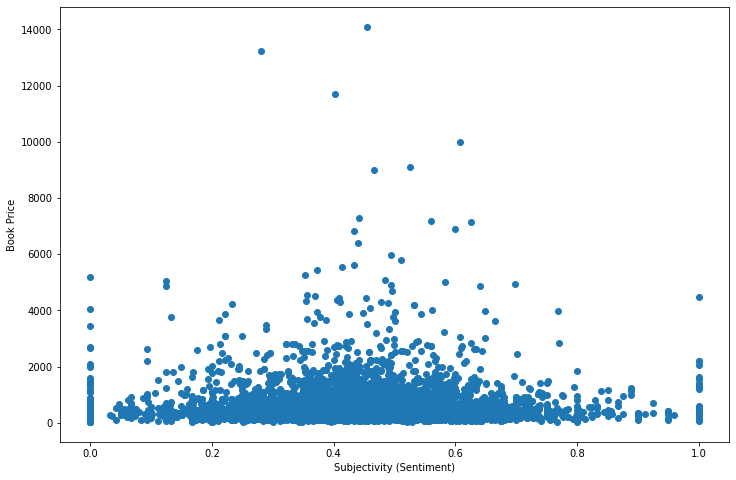

In [ ]:
plt.scatter( 'subjectivity','Price', data=train_data  )
plt.xlabel('Subjectivity (Sentiment)')
plt.ylabel('Book Price')
plt.show()

Edition Type

In [ ]:
train_data['Edition_Type_updated'].value_counts()

paperback    5353
hardcover     823
other          61
Name: Edition_Type_updated, dtype: int64

In [ ]:
train_data[['Edition_Type_updated','Price']].groupby(['Edition_Type_updated'], as_index=False).mean().sort_values(by='Edition_Type_updated', ascending=False)

,Edition_Type_updated,Price
2,paperback,490.839335
1,other,990.470820
0,hardcover,983.294168


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


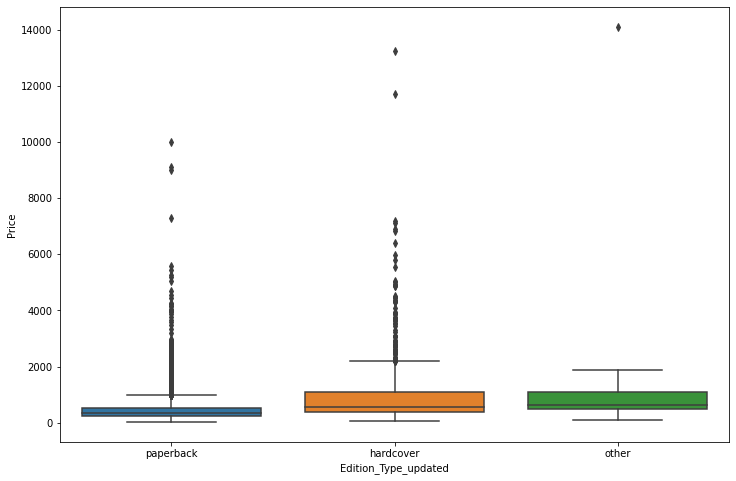

In [ ]:
sns.boxplot( 'Edition_Type_updated', 'Price', data=train_data )

Year

In [ ]:
#train_data['Year'].value_counts()

In [ ]:
train_data[['Year','Price']].groupby(['Year'], as_index=False).mean().sort_values(by='Year', ascending=False)

,Year,Price
55,2019,421.152548
54,2018,511.220541
53,2017,535.304293
52,2016,630.406328
51,2015,616.070771
50,2014,608.528109
49,2013,588.908943
48,2012,571.785987
47,2011,587.361161
46,2010,633.037404


Number of Reviews

In [ ]:
train_data['Num_of_reviews'].describe()

count    6237.000000
mean       35.984287
std       149.995031
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      6090.000000
Name: Num_of_reviews, dtype: float64

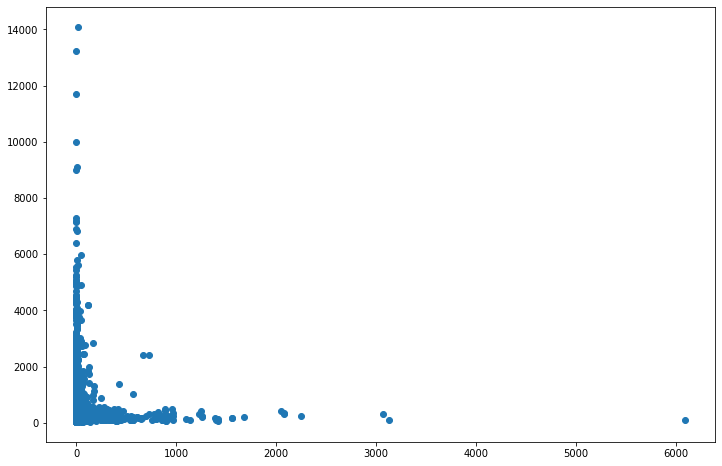

In [ ]:
plt.scatter( 'Num_of_reviews', 'Price', data=train_data )

In [ ]:
train_data[['Num_of_reviews','Price']].groupby(['Num_of_reviews'], as_index=False).mean().sort_values(by='Num_of_reviews', ascending=False)

,Num_of_reviews,Price
341,6090,99.000000
340,3135,80.000000
339,3075,296.000000
338,2255,247.000000
337,2084,350.000000
...,...,...
4,5,600.204100
3,4,694.803127
2,3,609.808961
1,2,666.919280


Rating

In [ ]:
train_data['Rating'].describe()

count    6237.000000
mean        4.269681
std         0.710319
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

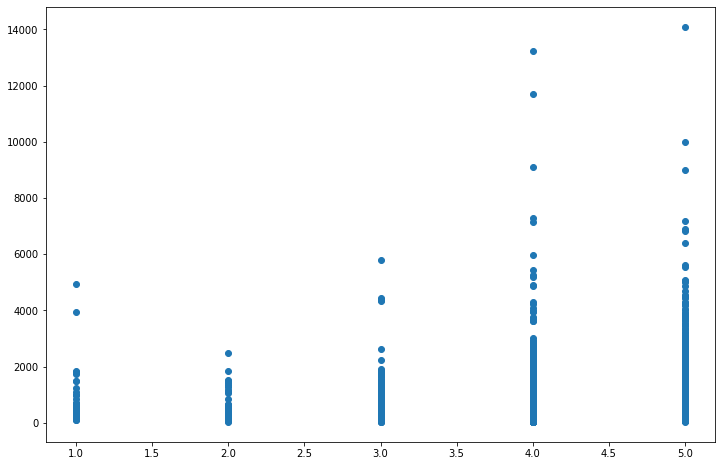

In [ ]:
plt.scatter( 'Rating', 'Price', data=train_data )

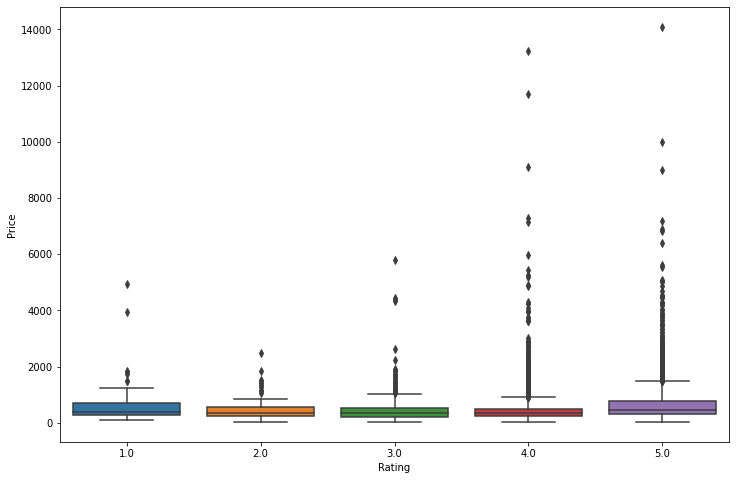

In [ ]:
sns.boxplot( y='Price', x='Rating', data=train_data )

#### Takeaways from Feature Analysis

*   Paperback Books are cheap
*   Year 1900 & 1977 had high average book price
*   Books having high number of reviews are cheaper.
*   High rated books are generally costly 

Some outliers have to removed



In [ ]:
# train_data = train_data[ train_data['Price']<8000 ]

# print(train_data.shape)

In [ ]:
train_data['Author']=train_data.Author.astype("category").cat.codes
train_data['BookCategory']=train_data.BookCategory.astype("category").cat.codes
train_data['Edition_Type_updated']=train_data.Edition_Type_updated.astype("category").cat.codes
train_data['Year']=train_data.Year.astype("category").cat.codes
train_data['Genre']=train_data.Genre.astype("category").cat.codes

In [ ]:
test_data['Author']=test_data.Author.astype("category").cat.codes
test_data['BookCategory']=test_data.BookCategory.astype("category").cat.codes
test_data['Edition_Type_updated']=test_data.Edition_Type_updated.astype("category").cat.codes
test_data['Year']=test_data.Year.astype("category").cat.codes
test_data['Genre']=test_data.Genre.astype("category").cat.codes

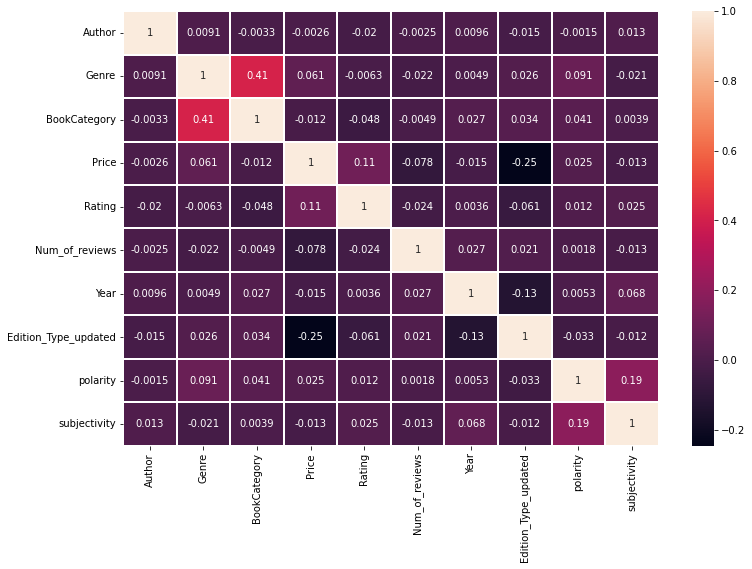

In [ ]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(train_data.corr(),annot=True, linewidths=1)
plt.show()

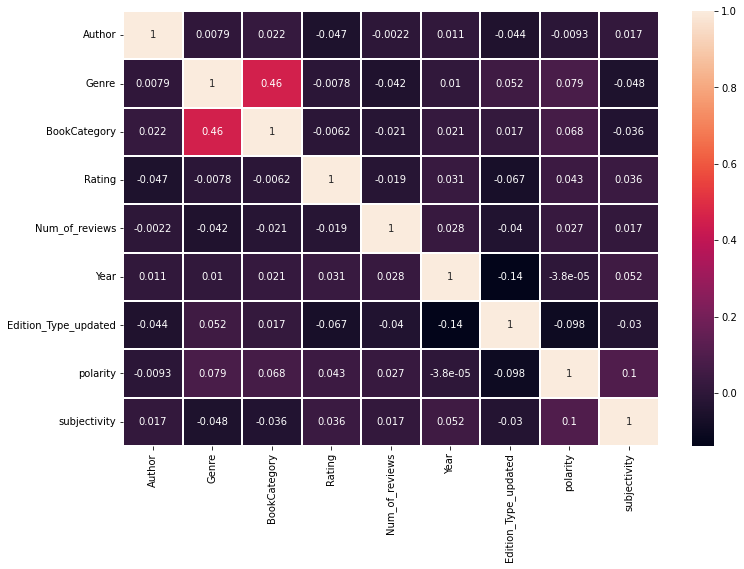

In [ ]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(test_data.corr(),annot=True, linewidths=1)
plt.show()

## Modeling

In [ ]:
train_data.reset_index(drop=True, inplace=True)

In [ ]:
# test_data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = train_data.drop('Price', axis =1)
y_train, param = boxcox(train_data.Price)

print('Optimal lambda', param)

scaler.fit(X)

X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(test_data)

Optimal lambda -0.13820326756118104


In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.20)

In [ ]:
#plt.hist(y)

In [ ]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 42)

rmse_cv(regressor)

array([0.26021298, 0.26638931, 0.25614898, 0.27097398, 0.27426981])

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression

lr_model = LinearRegression()
rmse_cv(lr_model)

array([0.30648111, 0.31171534, 0.30878382, 0.32061832, 0.31711502])

In [ ]:
ridge_model = Ridge(alpha=1,random_state=4)

rmse_cv(ridge_model)

array([0.30648164, 0.31171109, 0.30878394, 0.32061854, 0.31711457])

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1,random_state=4)

rmse_cv(lasso_model)

array([0.32619112, 0.32573634, 0.32895495, 0.34057382, 0.33304953])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=4)

rmse_cv(gb_model)

array([0.26463875, 0.27055824, 0.26449755, 0.27771803, 0.2786033 ])

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=4)

rmse_cv(xgb_model)

[12:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.26577452, 0.27101514, 0.26570856, 0.27881403, 0.27981529])

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=4)

rmse_cv(lgb_model)

array([0.25764796, 0.2561821 , 0.26051141, 0.26463954, 0.2703143 ])

In [ ]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_val)
print(mse(y_val, y_pred))
print(r2_score(y_val,y_pred))
print( np.sqrt(np.square(y_pred - y_val ).mean()))
print(np.sqrt(mse(y_val, y_pred)))

0.09166621731304239
0.3401139377299781
0.30276429332575266
0.30276429332575266


In [ ]:
lgb_model = lgb.LGBMRegressor(random_state=4 )

lgb_model.fit(X_train_scaled, y_train)
y_pred_test = lgb_model.predict(X_test_scaled)
y_pred_test = inv_boxcox(y_pred_test, param)
y_pred_test

array([192.01284312, 579.72974976, 290.85399743, ..., 377.03219698,
       350.41376441, 301.26813109])

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test,columns=['Price'])
y_pred_test

,Price
0,192.012843
1,579.729750
2,290.853997
3,439.931765
4,454.455308
...,...
1555,572.033040
1556,241.830676
1557,377.032197
1558,350.413764


In [ ]:
pd.DataFrame(y_pred_test,columns=['Price']).to_csv('3rdsubmission.csv',index=None)